In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')


In [5]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


**NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used.**

**Data Analysis Part**

In [6]:
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [7]:
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].min()

amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [8]:
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].max()

amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amount')

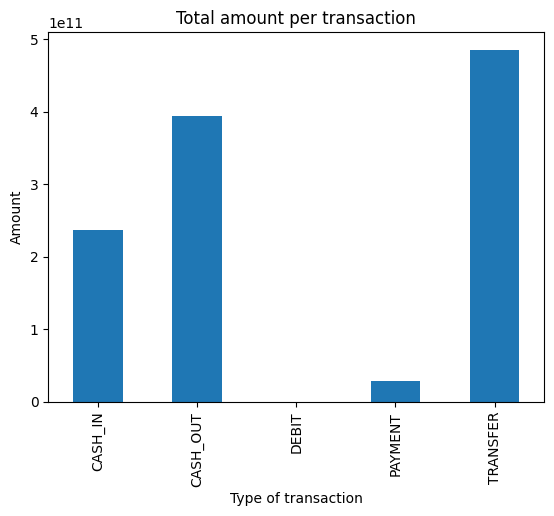

In [10]:
var=data.groupby('type').amount.sum()
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title('Total amount per transaction')
ax1.set_xlabel('Type of transaction')
ax1.set_ylabel('Amount')

In [11]:
data.loc[data.isFraud==1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [12]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [13]:
data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [14]:
data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [15]:
data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,1,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,2,181.00,181.00,0.00,0.0,0.00,1
3,1,3,181.00,181.00,0.00,21182.0,0.00,1
4,1,1,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,1,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,1,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,1,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,1,4024.36,2671.00,0.00,0.0,0.00,0
9,1,5,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [17]:
X = data.drop(['isFraud'],axis=1)
y = data[['isFraud']]


In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [23]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [24]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.7731809266519164
